<a href="https://colab.research.google.com/github/AnaghaWani/EDA/blob/main/nuforc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
ufo_db = "/content/drive/MyDrive/EDA-NUFORC-Dataset/scrubbed.csv"
ufo_data = pd.read_csv(ufo_db, low_memory = False)

In [6]:
ufo_data.shape

(80332, 11)

In [9]:
ufo_data.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [12]:
ufo_data.tail(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.477778


In [11]:
ufo_data.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [13]:
nulvals = ufo_data.isnull().sum()
nulpercent = (nulvals/len(ufo_data))*100
print("Null values (% of entries): ")
print(round(nulpercent.sort_values(ascending = False),2))

Null values (% of entries): 
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
datetime                 0.00
city                     0.00
duration (seconds)       0.00
duration (hours/min)     0.00
date posted              0.00
latitude                 0.00
longitude                0.00
dtype: float64


In [14]:
ufo_data['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [15]:
ufo_data = pd.read_csv(ufo_db, low_memory=False, na_values=['UNKNOWN', 'UNK'],
                       na_filter=True, skip_blank_lines=True)

In [16]:
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

In [17]:
ufo_data = pd.DataFrame(data=ufo_data, columns=ufo_subcols)

In [18]:
ufo_data = ufo_data.dropna(thresh=8)

In [19]:
ufo_data = ufo_data.reset_index(drop=True)

In [22]:
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'],errors = 'coerce')
ufo_data['longitude '] = pd.to_numeric(ufo_data['longitude '], errors='coerce')

In [25]:
ufo_date = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')
ufo_data['datetime'] = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')

In [27]:
ufo_data.shape

(80257, 10)

In [28]:
#visuals

In [54]:
#Visualisation of UFO sightings by Year
ufo_yr = ufo_date.dt.year
years_data = ufo_yr.value_counts()
years_index = years_data.index
years_values = years_data.values

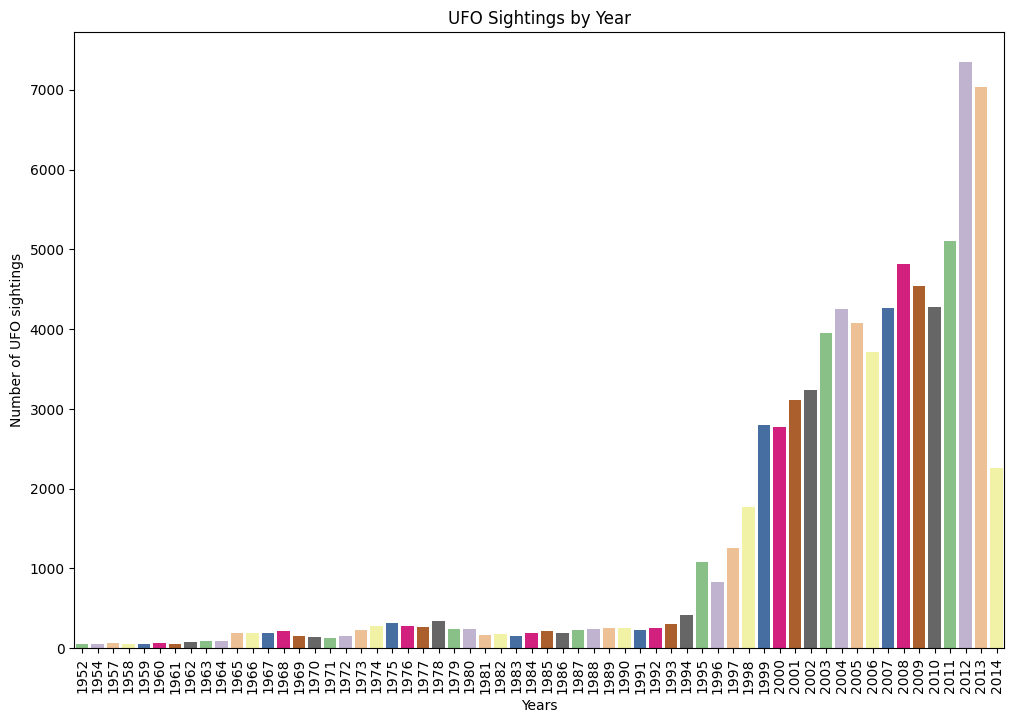

In [85]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
plt.title('UFO Sightings by Year')
plt.xlabel("Years")
plt.ylabel("Number of UFO sightings")

years_plot = sns.barplot(x=years_index[:60], y=years_values[:60], hue=years_index[:60], legend = False, palette = "Accent")

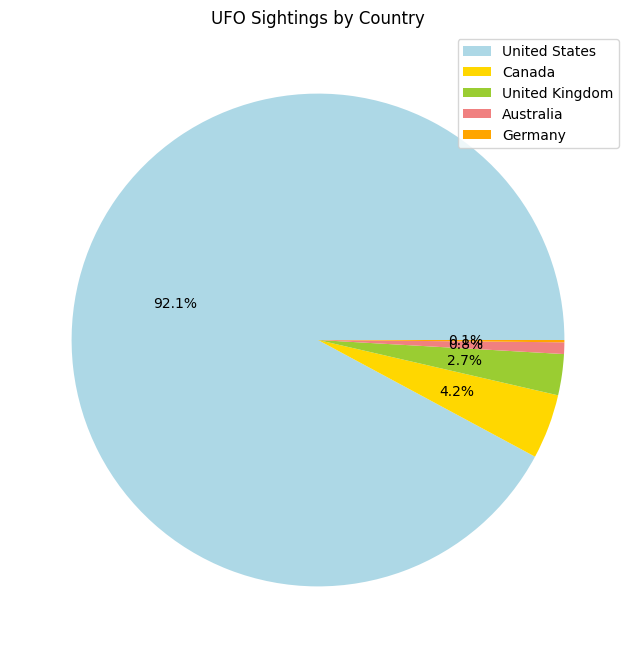

In [66]:
#Visualisation of UFO sightings by country
country_sig = ufo_data.country.value_counts()
plt.figure(figsize=(8, 8))
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
plt.pie(country_sig, autopct='%1.1f%%',colors=colors, startangle=0)
plt.title("UFO Sightings by Country")
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="upper right")

In [67]:
#UFO sightings by US state

In [70]:
filter_us = ufo_data['country']=='us'
us_data = ufo_data[filter_us]

In [73]:
us_data['state'].value_counts().head(10)

ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64

In [74]:
state_sights = us_data.state.value_counts()
state_names = state_sights.index
state_freq =  state_sights.values

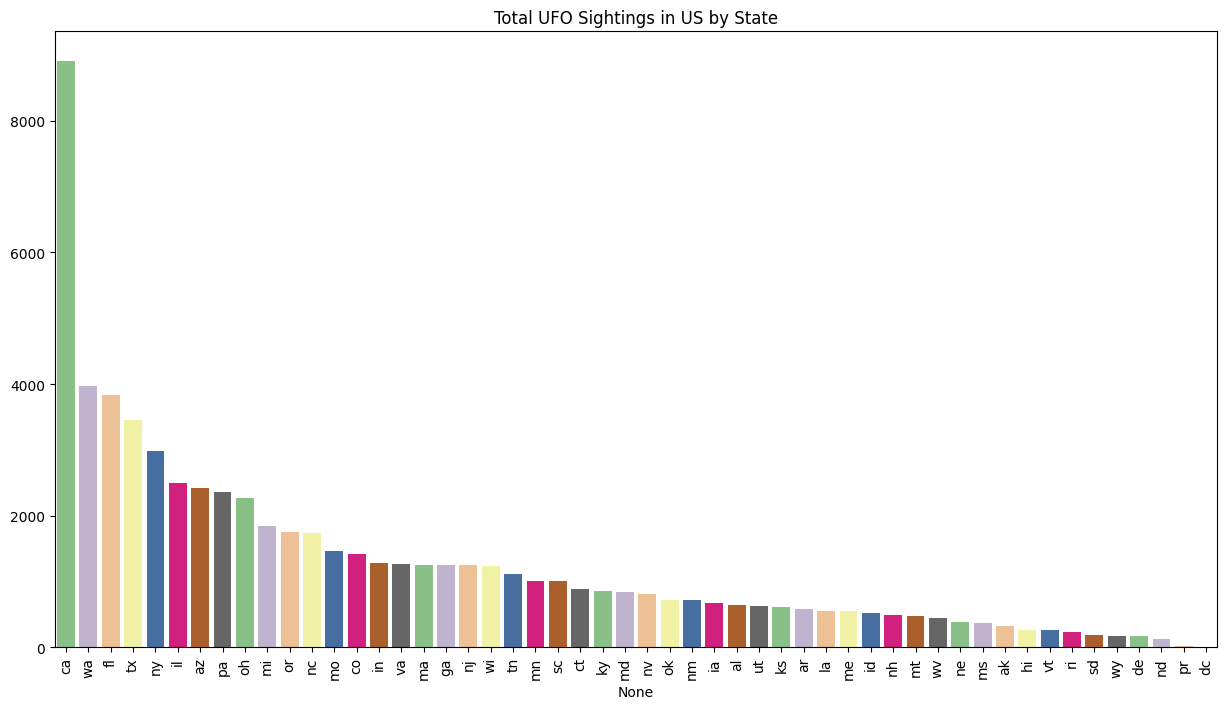

Top 10 States for Total UFO Sightings:
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64


In [84]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.title('Total UFO Sightings in US by State')
states_plot = sns.barplot(x=state_names, y=state_freq, hue=state_name, legend=False, palette="Accent")
plt.show()
print('Top 10 States for Total UFO Sightings:')
print(state_sights[:10].sort_values(ascending=False))

In [78]:
statespop = {'al':4872725.,'ak':746079.,'az':7044577.,'ar':2998643.,'ca':39506094.,
            'co':5632271.,'ct':3568174.,'de':960054.,'dc':691963.,'fl':20979964.,
            'ga':10421344.,'hi':1431957.,'id':1713452.,'il':12764031.,'in':6653338.,
            'ia':3147389.,'ks':2907857.,'ky':4449337.,'la':4694372.,'me':1333505.,
            'md':6037911.,'ma':6839318.,'mi':9938885.,'mn':5557469.,'ms':2988062.,
            'mo':6109796.,'mt':1052967.,'ne':1920467.,'nv':2996358,'nh':1339479.,
            'nj':8953517.,'nm':2081702.,'ny':19743395.,'nc':10258390.,'nd':759069.,
            'oh':11623656.,'ok':3939708.,'or':4162296.,'pa':12776550.,'pr':3661538.,
            'ri':1057245.,'sc':5027404.,'sd':872989.,'tn':6707332.,'tx':28295553.,
            'ut':3111802.,'vt':623100.,'va':8456029.,'wa':7415710.,'wv':1821151.,
            'wi':5789525.,'wy':584447.}

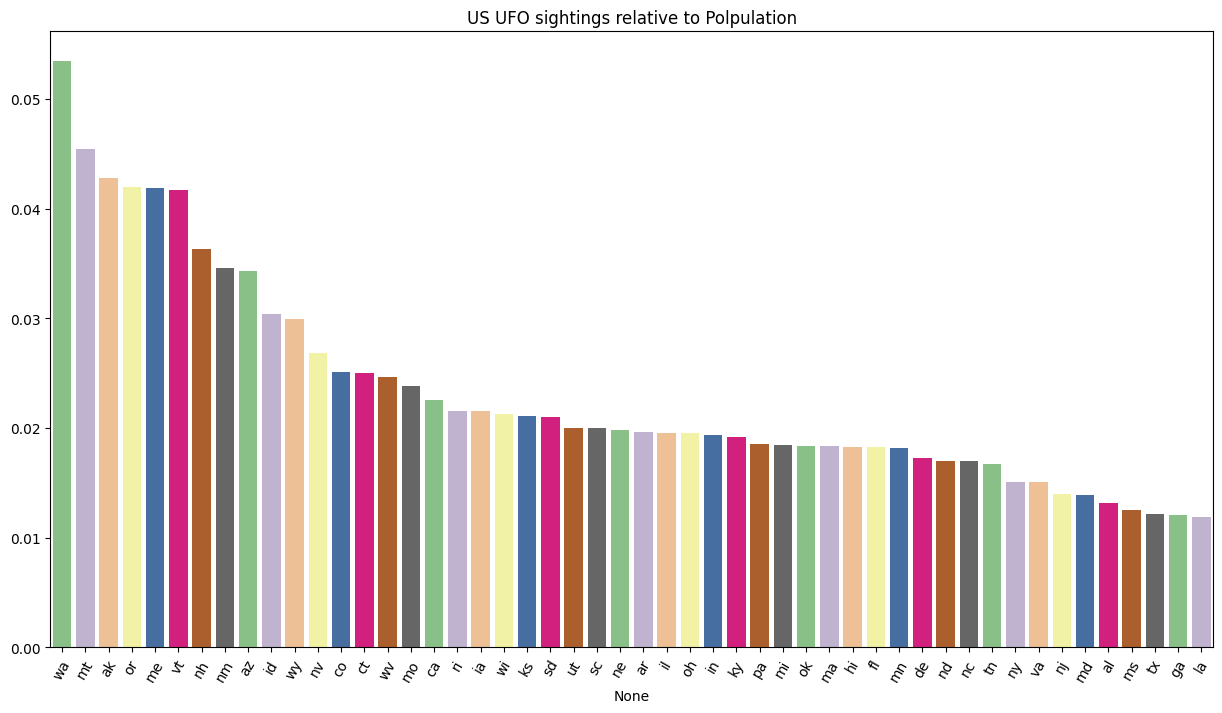

States with Highest Proportion of UFO Sightings:
wa    0.05
mt    0.05
ak    0.04
or    0.04
me    0.04
vt    0.04
nh    0.04
nm    0.03
az    0.03
id    0.03
dtype: float64


In [81]:
states_pop = pd.Series(statespop)
sight_by_pop = (state_sights / states_pop)*100
sight_by_pop = sight_by_pop.sort_values(ascending=False)
state_name = sight_by_pop.index
state_sight = sight_by_pop.values
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
plt.title("US UFO sightings relative to Polpulation")
sns.barplot(x=state_name[:50], y = state_sight[:50],hue=state_name[:50], legend=False, palette="Accent")
plt.show()
print('States with Highest Proportion of UFO Sightings:')
print(round(sight_by_pop[:10],2))